In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_diabetes
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

def apply_em(X, y, n_clusters, dataset_name,random_seed):
    # Apply Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=random_seed)
    y_pred = gmm.fit_predict(X)
    
    # Evaluate the clustering
    ari = adjusted_rand_score(y, y_pred)
    silhouette_avg = silhouette_score(X, y_pred)
    
    print(f"EM on {dataset_name}:")
    print(f"Adjusted Rand Index: {ari:.2f}")
    print(f"Silhouette Score: {silhouette_avg:.2f}\n")
    
    return y_pred

def apply_kmeans(X, y, n_clusters, dataset_name,random_seed):
    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed,n_init='auto')
    y_pred = kmeans.fit_predict(X)
    
    # Evaluate the clustering
    ari = adjusted_rand_score(y, y_pred)
    silhouette_avg = silhouette_score(X, y_pred)
    
    print(f"K-Means on {dataset_name}:")
    print(f"Adjusted Rand Index: {ari:.2f}")
    print(f"Silhouette Score: {silhouette_avg:.2f}\n")
    
    return y_pred


def plot_clusters(X, y_pred, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar()
    plt.savefig(title+'.png')

def run_data(x,y,n,ds_name,random_seed):
    # Apply EM on digits dataset
    y_pred_digits_em = apply_em(x, y, n, ds_name,random_seed)
    # Apply K-Means on digits dataset
    y_pred_digits_kmeans = apply_kmeans(x, y, n,ds_name,random_seed)
    # Visualize the results for digits dataset
    plot_clusters(x, y_pred_digits_em, "EM Clustering on "+ds_name+" Dataset")
    plot_clusters(x, y_pred_digits_kmeans, "K-Means Clustering on "+ds_name+" Dataset")



G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


EM on Digits:
Adjusted Rand Index: 0.90
Silhouette Score: 0.37

K-Means on Digits:
Adjusted Rand Index: 0.65
Silhouette Score: 0.46



G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


EM on Diabetes:
Adjusted Rand Index: 0.00
Silhouette Score: 0.18

K-Means on Diabetes:
Adjusted Rand Index: 0.00
Silhouette Score: 0.24



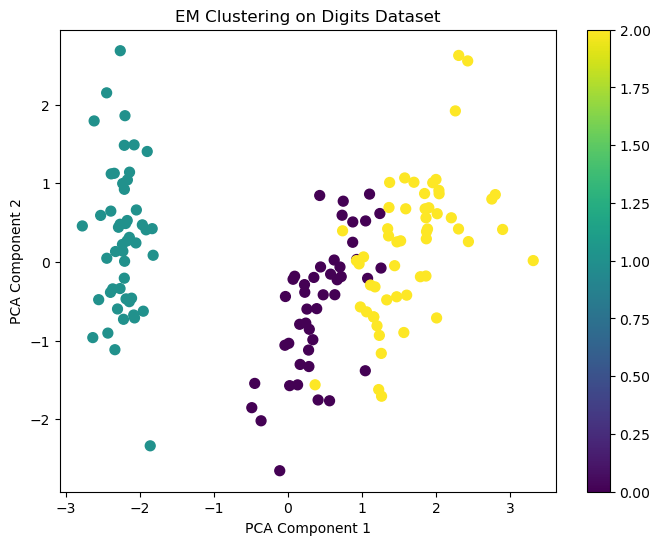

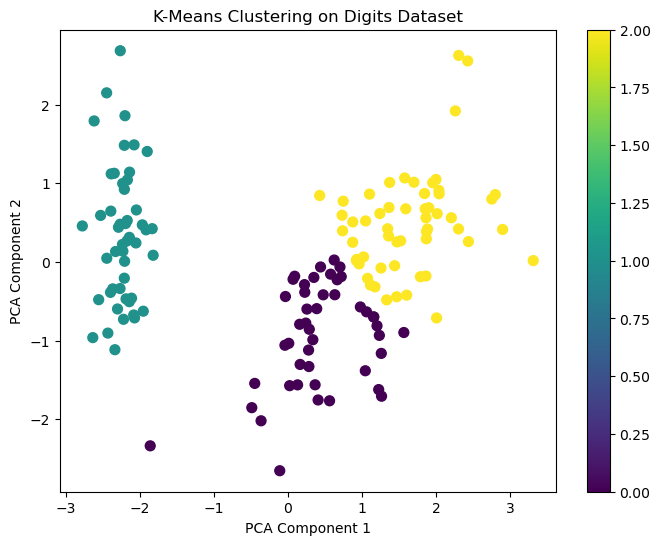

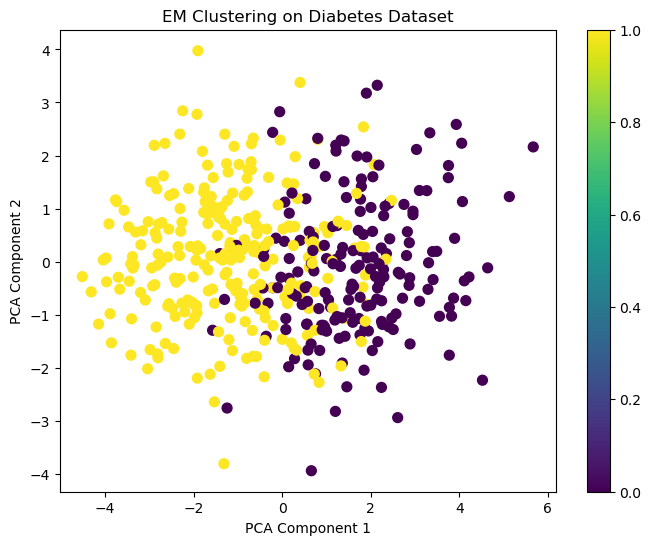

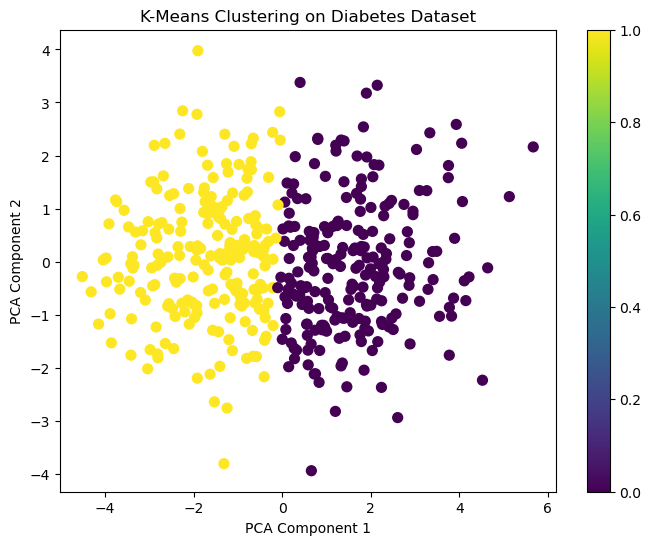

In [2]:
gtid=903789757
# Load datasets
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Standardize the datasets
scaler = StandardScaler()
X_iris = scaler.fit_transform(X_iris)
X_diabetes = scaler.fit_transform(X_diabetes)
# Number of clusters (10 for digits and 2 for diabetes, as an example)
n_clusters_iris = 3
n_clusters_diabetes = 2
run_data(X_iris,y_iris,n_clusters_iris,"Digits",gtid)
run_data(X_diabetes,y_diabetes,n_clusters_diabetes,"Diabetes",gtid)

In [3]:
y_diabetes

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28